In [ ]:
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import keras
import numpy as np
import argparse
import locale
import os
import sklearn
from sklearn import metrics
from sklearn.datasets import make_regression
#from sklearn import preprocessing, cross_validation, neighbors
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Conv2D, MaxPooling2D
from keras.regularizers import l2
def create_mlp(dim, regress=False):
	# define our MLP network
	model = Sequential()
	model.add(Dense(8, input_dim=dim, activation="relu"))
	model.add(Dense(4, activation="relu"))

	# check to see if the regression node should be added
	if regress:
		model.add(Dense(1, activation="linear"))

	# return our model
	return model

def create_cnn(width, height, depth, filters=(3, 4, 6), regress=False):
	# initialize the input shape and channel dimension, assuming
	# TensorFlow/channels-last ordering
	inputShape = (height, width, depth)
	chanDim = -1

	# define the model input
	inputs = Input(shape=inputShape)

	# loop over the number of filters
	for (i, f) in enumerate(filters):
		# if this is the first CONV layer then set the input
		# appropriately
		if i == 0:
			x = inputs

		# CONV => RELU => BN => POOL
		x = Conv2D(f, (3, 3), padding="same")(x)
		x = Activation("relu")(x)
		x = BatchNormalization(axis=chanDim)(x)
		x = MaxPooling2D(pool_size=(2, 2))(x)

	# flatten the volume, then FC => RELU => BN => DROPOUT
	x = Flatten()(x)
	x = Dense(16)(x)
	x = Activation("relu")(x)
	x = BatchNormalization(axis=chanDim)(x)
	x = Dropout(0.5)(x)

	# apply another FC layer, this one to match the number of nodes
	# coming out of the MLP
	x = Dense(3)(x)
	x = Activation("relu")(x)

	# check to see if the regression node should be added

	if regress:
		x = Dense(3, activation="linear")(x)

  
	# construct the CNN
	model = Model(inputs, x)

	# return the CNN
	return model




def proc(img): 
  image = Image.open(img)
  newsize = (523,523)
  newimage = image.resize(newsize)
  #newimage.show()
  imagea = np.array(newimage)
 
  plt.imshow(newimage)
  mosaic = np.zeros((imagea.shape), dtype = np.uint8)
 
 
 
 
  for i in range(len(imagea)):
      for j in range(len(imagea[0])):
          if(i%2==0):
              if(j%2 ==0):
                  mosaic[i][j][0] = imagea[i][j][0]
              else:
                  mosaic[i][j][1] = imagea[i][j][1]
          else:
              if(j%2 ==0):
                  mosaic[i][j][1] = imagea[i][j][1]
              else:
                  mosaic[i][j][2] = imagea[i][j][2]
 
              
  demosaic = Image.fromarray(mosaic)
  plt.imshow(demosaic)
  features = []
  targets =[]
  #black = [0,0,0]
  block=[]
  #it = 0
  for i in range(6, len(imagea)-5):
      for j in range(6, len(imagea[0])-5):
        #it+=1
        if(np.random.randint(100)<10):
          
          
          features.append(np.array(demosaic.crop((i-4, j-4, i+5, j+5))))
          targets.append(np.array(imagea[j][i]))
          block =[]
      #print(it)
      #print(it)
        
  return((features,targets))

def proc2(img): 
  image = Image.open(img)
  newsize = (523,523)
  newimage = image.resize(newsize)
  #newimage.show()
  imagea = np.array(newimage)
 
  plt.imshow(newimage)
  mosaic = np.zeros((imagea.shape), dtype = np.uint8)
 
 
 
 
  for i in range(len(imagea)):
      for j in range(len(imagea[0])):
          if(i%2==0):
              if(j%2 ==0):
                  mosaic[i][j][0] = imagea[i][j][0]
              else:
                  mosaic[i][j][1] = imagea[i][j][1]
          else:
              if(j%2 ==0):
                  mosaic[i][j][1] = imagea[i][j][1]
              else:
                  mosaic[i][j][2] = imagea[i][j][2]
 
              
  demosaic = Image.fromarray(mosaic)
  #plt.imshow(demosaic)
  features = []
  targets =[]
  #black = [0,0,0]
  block=[]
  #it = 0
  for i in range(6, len(imagea)-5):
      for j in range(6, len(imagea[0])-5):
        #it+=1
        features.append(np.array(demosaic.crop((i-4, j-4, i+5, j+5))))
        targets.append(np.array(imagea[j][i]))
        block =[]
      #print(it)
      #print(it)
        
  return((features,targets))



def proc1(img): 
  image = Image.open(img)
  newsize = (523,523)
  newimage = image.resize(newsize)
  
  imagea = np.array(newimage)
 
  plt.imshow(newimage)

 
              
  #demosaic = Image.fromarray(mosaic)
  #plt.imshow(demosaic)
  features = []
  targets =[]
  #black = [0,0,0]
  block=[]
  #it = 0
  for i in range(6, len(imagea)-5):
      for j in range(6, len(imagea[0])-5):
        features.append(newimage.crop((i-4, j-4, i+5, j+5)))
        targets.append(imagea[j][i])
        block =[]
      #print(it)
      #print(it)
        
  return((features,targets))

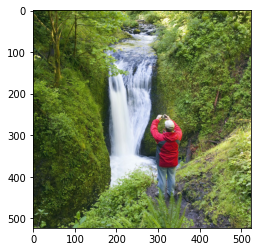

In [ ]:
a = proc('/content/drive/MyDrive/Colab/cat0.jpg')

In [ ]:
targets = a[1]
features = a[0]

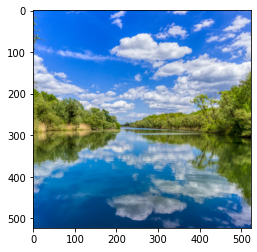

In [ ]:

b = proc('/content/drive/MyDrive/Colab/cat'+str(129)+'.jpg')
  
 
for j in range(len(b[0])):
  features.append(b[0][j])
  targets.append(b[1][j])



for i in range(128):
  b = proc('/content/drive/MyDrive/Colab/cat'+str(i+1)+'.jpg')
  
 
  for j in range(len(b[0])):
    features.append(b[0][j])
    targets.append(b[1][j])

126
127


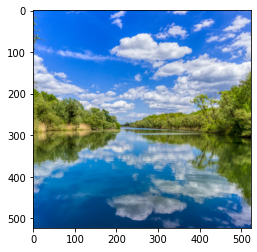

In [ ]:


a = proc('/content/drive/MyDrive/Colab/cat0.jpg')
x_test = a[0]
y_test = a[1]
for i in range(126, 128):
  print(i)
  b = proc('/content/drive/MyDrive/Colab/cat'+str(i+1)+'.jpg')
  for j in range(len(b[0])):
    x_test.append(b[0][j])
    y_test.append(b[1][j])
 
  


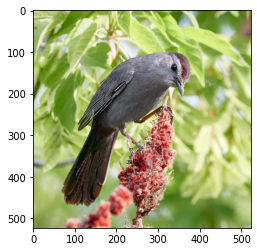

In [ ]:
aa = proc1('/content/drive/MyDrive/Colab/cat127.jpg')

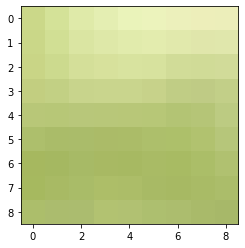

In [ ]:
plt.imshow(aa[0][0])

In [ ]:
features = np.load('features.npy')
targets = np.load('targets.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')
features, targets = np.array(features), np.array(targets)
sc = StandardScaler()
#features = sc.fit_transform(features)

In [ ]:
x_test = np.array(x_test)

In [ ]:
y_test = np.array(y_test)

In [ ]:
model = Sequential()
model.add(Input(shape=(9, 9, 3)))  # 250x250 RGB images
model.add(Conv2D(9, 4, activation="relu"))
model.add(Conv2D(5, 2, activation="relu"))
#model.add(MaxPooling2D(3))
model.add(Flatten())
model.add(Dense(10, activation="relu", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dense(len(targets[0]), activation = 'linear'))
 
model.compile( optimizer='adam', metrics='accuracy',loss = "mean_squared_error")  

In [ ]:
new = model.fit(features,targets, batch_size=64, epochs=2,shuffle = True)
#new = keras.models.load_model('/content/drive/MyDrive/Colab/models/CNNMODEL')

53286/53286 [==============================] - 121s 2ms/step - loss: 27.1223 - accuracy: 0.9113


In [ ]:
model.evaluate(x_test, y_test)

2463/2463 [==============================] - 4s 2ms/step - loss: 25.5064 - accuracy: 0.9598


[25.506389617919922, 0.9598299264907837]

In [ ]:
print(len(targets[0]))
print(len(features[0][0]))

3
9


In [ ]:
#model.save('/content/drive/MyDrive/Colab/models/CNNMODEL')


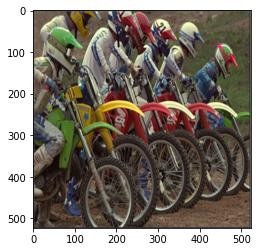

In [ ]:
pp = proc2('/content/drive/MyDrive/Colab/kodim05.png')

In [ ]:
xpred = np.array(pp[0])
ypred = np.array(pp[1])

In [ ]:
print(len(xpred))

262144


In [ ]:

#finaltest = np.array(finaltest)
#final = Image.fromarray(finaltest.astype(np.uint8))
lastLeaf = new.predict(xpred)


In [ ]:
f = pp[0]
t = pp[1]
 

 
demo = lastLeaf
demo = demo.tolist()
demo.append((0,0,0))
demo = np.array(demo)
 
 
llst = []
 
 
 
for i in range(len(demo)):
    for j in range(len(demo[0])):
        if(demo[i][j]>255):
            demo[i][j] = 255
        if(demo[i][j]<0):
            demo[i][j] = 0
for i in range(512):
    
        
    llst.append(demo[262144-(i+1)*512:262144-512*(i)])
    #print(len(demo[i*512:512*(i+1)][0]))
    if(len(llst[i])!= 512):
        print(i, "errior")


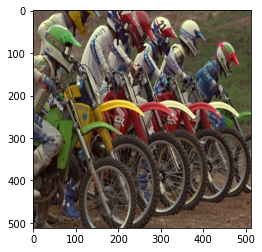

In [ ]:
llst = np.array(llst)
final = Image.fromarray(llst.astype(np.uint8))
plt.imshow(final.rotate(270))

In [ ]:
ffff = new.evaluate(xpred,ypred)

8192/8192 [==============================] - 15s 2ms/step - loss: 8.7944 - accuracy: 0.9452


In [ ]:
print(llst.shape)

In [ ]:
final = Image.fromarray(llst)

In [ ]:
plt.imshow(final.rotate(270))

In [ ]:
model.predict(finaltest[0], finaltest[1])